# 1. IMPORTS

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import model_selection
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt

# 2. Classification

## 2.1 Iris Dataset

In [2]:
# load data
data = datasets.load_iris(as_frame=True)

# Separate predictor and trget variables
X, y = data.data, data.target

# Train/Test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set the number of samples and features
n_samples, n_features = X.shape

### 2.1 KNN

In [3]:
# Define
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit
knn_classifier.fit(X_train, y_train)

# Predict 
yhat_test = knn_classifier.predict_proba(X_test)

Since we have a multiclass problem, we we will use the **one vs rest strategy**, which consists in create one ROC curve for each class, making it as positive class, and the junction of the other classes as negative class.

In [4]:
# fit label binarizer
label_binarizer = LabelBinarizer().fit(y_train)

# create an array for each example, where i = 1 corresponds to the class (if 1 is in 3rd position, it corresponds to class 3)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(30, 3)

In [53]:
# Showing binarizer 
print(y_onehot_test[:, 0])
print(y_onehot_test[:, 1])
print(y_onehot_test[:, 2])

[1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1]
[0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0]
[0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0]


In [54]:
# Showing the probabilities
print(yhat_test[:, 0])
print(yhat_test[:, 1])
print(yhat_test[:, 2])

[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1.]
[0.  0.4 1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.
 0.8 0.4 0.  0.  1.  0.2 0.  0.6 1.  0.  0.  0. ]
[0.  0.6 0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.
 0.2 0.6 0.  1.  0.  0.8 1.  0.4 0.  0.  1.  0. ]


<Figure size 1800x1000 with 0 Axes>

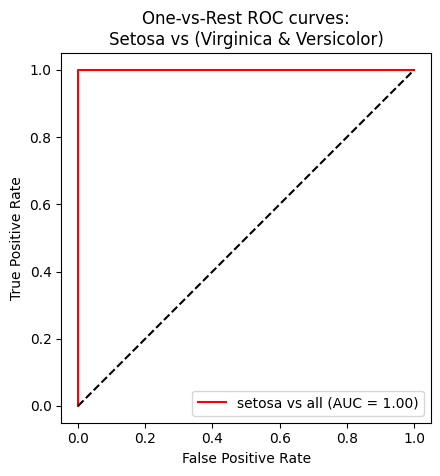

In [63]:
# Let's define the class of our interest
class_of_interest = 'setosa'

# apply flatnonzero to find which value of the sequence correspond to the class of interest
class_id = np.flatnonzero(data.target_names == class_of_interest)[0]

# Roc curve showing setosa class
plt.figure(figsize=(18, 10))

metrics.RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], 
                                         yhat_test[:, class_id], 
                                         name=f'{class_of_interest} vs all',
                                         color='red')

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis('square')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nSetosa vs (Virginica & Versicolor)")
plt.show()

<Figure size 1800x1000 with 0 Axes>

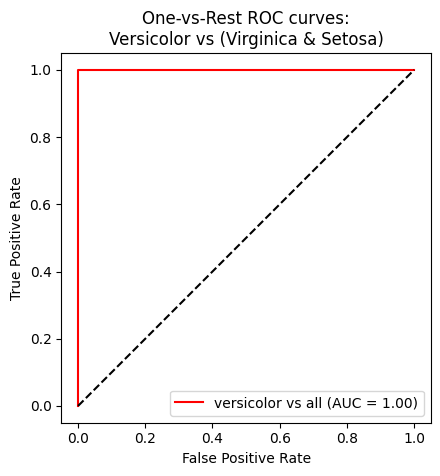

In [65]:
# Let's define the class of our interest
class_of_interest = 'versicolor'

# apply flatnonzero to find which value of the sequence correspond to the class of interest
class_id = np.flatnonzero(data.target_names == class_of_interest)[0]

# Roc curve showing setosa class
plt.figure(figsize=(18, 10))

metrics.RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], 
                                         yhat_test[:, class_id], 
                                         name=f'{class_of_interest} vs all',
                                         color='red')

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis('square')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVersicolor vs (Virginica & Setosa)")
plt.show()

<Figure size 1800x1000 with 0 Axes>

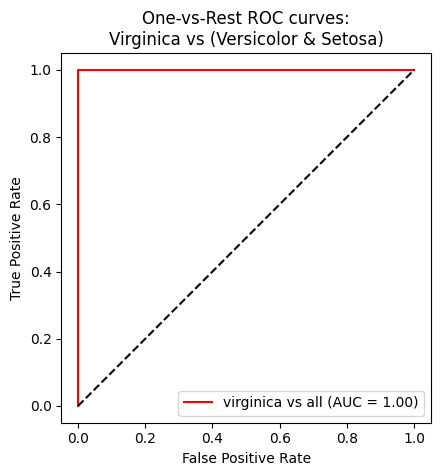

In [66]:
# Let's define the class of our interest
class_of_interest = 'virginica'

# apply flatnonzero to find which value of the sequence correspond to the class of interest
class_id = np.flatnonzero(data.target_names == class_of_interest)[0]

# Roc curve showing setosa class
plt.figure(figsize=(18, 10))

metrics.RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], 
                                         yhat_test[:, class_id], 
                                         name=f'{class_of_interest} vs all',
                                         color='red')

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis('square')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Versicolor & Setosa)")
plt.show()

Since all classes had a result of 100% of AUC, we understand that each attributed class were clasified correctly.

[https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76](https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76)